# Data Description
Over the years, PDF has been the most widely used document format due to its portability and reliability. Unfortunately, PDF popularity and its advanced features have allowed attackers to exploit them in numerous ways. There are various critical PDF features that an attacker can misuse to deliver a malicious payload.

## Data collection and analysis

our data collected 11,173 malicious files from Contagio, 20,000 malicious files from VirusTotal, and 9,109 benign files from Contagio.

Once collected, apply feature extraction to end 32 features from each, and after deduplicating the records, it wisely combined the two dataset records into one final file, which resulted in a more representative dataset of the PDF distribution. Moreover, it employed K-means, an unsupervised machine learning that clusters the resource data points into two groups by their similarity. The samples **falling into the wrong cluster** with the *malicious* label are taken as an **evasive set of malicious** records, with an intuition that the features of these samples were not so similar with the rest of the class so that they are not clustered with the majority of the same label samples. Then applied the same logic for the benign records and finally combined the results with the new "Evasive-PDFMal2022". The flowchart for the same is as shown.

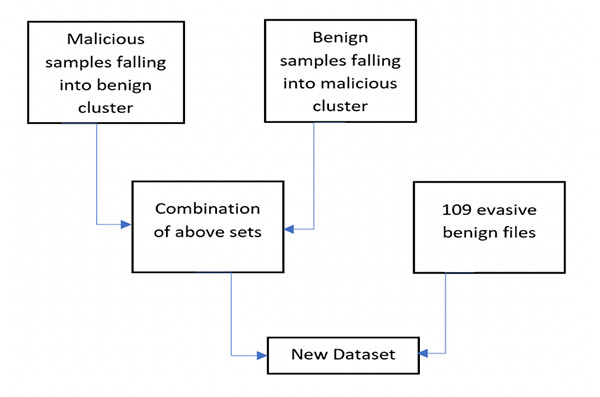

## Proposed features
37 static representative features, including 12 general features and 25 structural features extracted from each PDF file(Table missed obj feature), are depicted in the table.

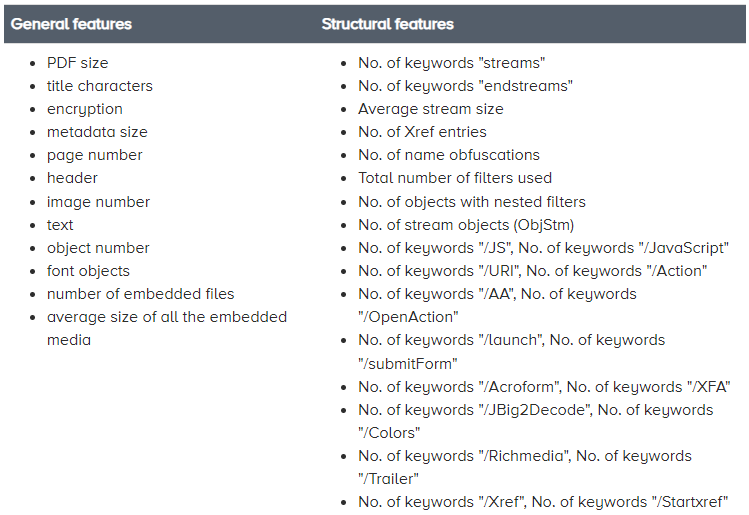

#### General features: 
These features generally describe the PDF file, such as its size, whether it contains text or images, number of pages, and the title. There are 12 features from this category.

- Number of characters in the title: Legitimate PDF files usually have a proper and more meaningful titles.
- Metadata size: Metadata is the section where information about the PDF file is provided, which can be exploited for embedding hidden contents.
- Document Encryption: This feature shows whether the PDF document is password protected or not.
- Number of pages: Malicious PDF files tend to have fewer pages (most of them have one blank page) as they are not concerned about content presentation.
- Presence of text inside the PDF: As content presentation is not the objective of malware PDF files, they may include less text in their files.
- Size of the whole document: The malicious PDF size usually tends to vary from the benign due to its variation in page size and content.
- Number of embedded files inside the document: PDFs are capable of attaching/embedding different types of files within themselves that might be used for exploitation, including other PDF files, doc files, images, etc.
- Average size of all the embedded media: Embedded files in the PDF may be of various sizes depending on what they contain. The average size might lead to an insight into the content of the embedded files.
- Number of total objects inside the PDF: As PDFs are made of objects, the number of objects combined with the rest of the features can represent the PDF in general.
- Number of font objects: Font objects indicate the types of fonts used for the PDF text.
- Presence of a valid PDF Header: As PDF header obfuscation is common for evading anti-virus scans, malicious PDF files tend to modify the header format.
- Number of images in the document: PDF files may contain one or any number of images.

### Structural features: 
These features describe the PDF file in terms of the structure, which requires a deeper parsing and provide an insight into the overall skeleton of the PDF. We propose a set of 25 features related to the PDF structure.

- Number of indirect objects: This might be some indication of an obfuscation attempt.
- Number of obfuscations: PDFs support many types of obfuscations such as string obfuscations of hex, octal etc. which are generally applied for evasion attempts.
- Number of streams: This shows the number of sequences of binary data in the PDF.
- Number of of endstreams: Keywords that denote the end of the streams.
- Average Stream size: Size of the stream as the malicious code may be hidden inside streams.
- Number of stream objects (ObjStm): Streams that contain other objects.
- Number of Javascript keywords: This denotes the number of objects containing Javascript code, which is the most commonly exploited feature as evident.
- Number of JS keywords: Number of objects containing Javascript code.
- Number of Launch keywords: Launch is a keyword that can be used to execute a command or program.
- Number of URI keywords: Indicates a presence of URL to which the PDF file attempts to connect to.
- Number of Action keywords: Specifies a specific action upon an event.
- Number of AA keywords: Specifies a specific action upon an event.
- Number of OpenAction keywords: Specifies a specific action upon opening the PDF file. This feature combined with Javascript has been observed in the majority of typical malicious PDF files.
- Number of SubmitForm tags: Indicates the PDF button that collects form information and sends them to specified destinations.
- Number of Acroform tags: Acrobat forms are PDF files containing form fields that support scripting technologies that can be misused for attackers.
- Total number of filters used: There are various types of compression filters applied on some PDF objects, which also might be exploited by attackers.
- Presence of JBig2Decode filter: JBig2Decode is a common filter to encode malicious content.
- Number of objects with nested filters: Nested filters can be an indication of evasion, as they make the decoding process more difficult.
- XFA: XFAs are XML Form Architecture included in certain PDF 40 files that support scripting technologies that can be misused for attackers.
- Colors: Different colors used in the PDF.
- Trailer: Number of trailers inside the PDF.
- Xref: Number of Xref tables.
- Startxref: Number of keywords with ”startxref” which denotes where the Xref table is started.
- Xref enteries: The number of entries in the PDF Xref tables as malformed Xref tables are another common observation in malicious PDF files.
- RichMedia: Number of RichMedia keywords which denotes the number of embedded media and flash files.

#### Notice: 
our features is extracted by PDFMalLyzer and this program extracts 31 different features from a set of pdf files specified by the user and writes them on a csv file.
- Check: https://github.com/ahlashkari/PDFMalLyzer

In [96]:
# !pip install missingno
# !pip install fancyimpute

In [101]:
# Import required Modules.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Imputation
from fancyimpute import IterativeImputer

# Visualize missing
import missingno as msno

%matplotlib inline

In [120]:
df_pdf = pd.read_csv('PDFMalware2022.csv')

# Display first 5 Rows.
df_pdf.head()

Fine name  pdfsize  metadata size  \
0  aedaf3c5428a2e3ba600c44b96ad78dfdf8ed76e7df129...      8.0          180.0   
1  fe767fb2584a10c010626263ea950643ac25f6ca24628f...     15.0          224.0   
2  544c5223ee301affad514b6fa585b3191625aba0a7222b...      4.0          468.0   
3  669772e626deccb9cfb7eb6a61e13d248d0ea08f1abe15...     17.0          250.0   
4  e434c884f45a691b0bf33d765f61794007eb0b8bb9f590...      7.0          252.0   

   pages  xref Length  title characters  isEncrypted  embedded files images  \
0    1.0         11.0               0.0          0.0             0.0      0   
1    0.0         20.0               7.0          0.0             0.0      0   
2    2.0         13.0              16.0          0.0             0.0      0   
3    1.0         15.0               0.0          0.0             0.0      0   
4    3.0         16.0              45.0          0.0             0.0      0   

  text  ... AA OpenAction Acroform  JBIG2Decode RichMedia launch  \
0   No  ...  0          1        0            0         0      0   
1   No  ...  0          0        1            0         0      0   
2  Yes  ...  0          1        0            0         0      0   
3   No  ...  0          1        1            0         0      0   
4  Yes  ...  0          1        0            0         0      0   

   EmbeddedFile XFA Colors      Class  
0             0   0    0.0  Malicious  
1             8   1    0.0  Malicious  
2             0   0    0.0  Malicious  
3             0   0    0.0  Malicious  
4             0   0    0.0  Malicious  

[5 rows x 33 columns]

In [121]:
# Get a brief summary for our PDF dataset.
df_pdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10026 entries, 0 to 10025
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fine name         10026 non-null  object 
 1   pdfsize           10025 non-null  float64
 2   metadata size     10025 non-null  float64
 3   pages             10025 non-null  float64
 4   xref Length       10025 non-null  float64
 5   title characters  10025 non-null  float64
 6   isEncrypted       10025 non-null  float64
 7   embedded files    10025 non-null  float64
 8   images            10025 non-null  object 
 9   text              10025 non-null  object 
 10  header            10025 non-null  object 
 11  obj               10023 non-null  object 
 12  endobj            10023 non-null  object 
 13  stream            10023 non-null  float64
 14  endstream         10023 non-null  object 
 15  xref              10023 non-null  object 
 16  trailer           10023 non-null  float6

In [122]:
# Check number of (Columns, Rows) in our dataset.
df_pdf.shape  #(31 features, 1 Fine Name, 1 Class -> 33)

(10026, 33)

We can see -> **shape** function raised 10026 Rows, and 33 column

In [123]:
# check data types for our dataset.
df_pdf.dtypes.value_counts()

object     21
float64    12
dtype: int64

In [124]:
# Show Stats summary for our numeric/float64 columns.
df_pdf.describe()

pdfsize  metadata size         pages    xref Length  \
count  10025.000000   10025.000000  10025.000000   10025.000000   
mean      87.209476     334.099352      3.398105    2739.220549   
std      444.197122    1565.853177     11.902471   18139.229396   
min       -1.000000      -1.000000     -1.000000      -1.000000   
25%        9.000000     180.000000      1.000000      12.000000   
50%       36.000000     265.000000      1.000000      21.000000   
75%       80.000000     319.000000      2.000000      77.000000   
max    23816.000000   77185.000000    595.000000  263987.000000   

       title characters   isEncrypted  embedded files        stream  \
count      10025.000000  10025.000000    10025.000000  10023.000000   
mean          51.477207     -0.020848       -0.006484     17.341215   
std         1354.640037      0.206789        0.257098     35.330169   
min           -1.000000     -1.000000       -1.000000     -1.000000   
25%            0.000000      0.000000        0.000000      2.000000   
50%            0.000000      0.000000        0.000000      4.000000   
75%           13.000000      0.000000        0.000000     18.000000   
max        76993.000000      4.000000        5.000000    812.000000   

            trailer       encrypt        ObjStm        Colors  
count  10023.000000  10023.000000  10023.000000  10023.000000  
mean       1.203532     -0.043500      1.516811      2.087000  
std        1.370455      0.256045      7.633485     58.178074  
min       -1.000000     -1.000000     -1.000000     -1.000000  
25%        1.000000      0.000000      0.000000      0.000000  
50%        1.000000      0.000000      0.000000      0.000000  
75%        2.000000      0.000000      0.000000      0.000000  
max       46.000000      2.000000    600.000000   5682.000000

### Check Missing Values

In [125]:
# Check total Missing values.
sum(df_pdf.isnull().sum())

74

In [126]:
# Check Missing values for each column
df_pdf.isnull().sum()

Fine name           0
pdfsize             1
metadata size       1
pages               1
xref Length         1
title characters    1
isEncrypted         1
embedded files      1
images              1
text                1
header              1
obj                 3
endobj              3
stream              3
endstream           3
xref                3
trailer             3
startxref           3
pageno              3
encrypt             3
ObjStm              3
JS                  3
Javascript          3
AA                  3
OpenAction          3
Acroform            3
JBIG2Decode         3
RichMedia           3
launch              3
EmbeddedFile        3
XFA                 3
Colors              3
Class               1
dtype: int64

In [127]:
# Display Missing values for specific column
df_pdf[df_pdf.Class.isnull()]

Fine name  pdfsize  \
1339  3329abf72745a8483b96f60d48774177d2ca3f8ec37316...      NaN   

      metadata size  pages  xref Length  title characters  isEncrypted  \
1339            NaN    NaN          NaN               NaN          NaN   

      embedded files images text  ...   AA OpenAction Acroform  JBIG2Decode  \
1339             NaN    NaN  NaN  ...  NaN        NaN      NaN          NaN   

     RichMedia launch  EmbeddedFile  XFA Colors  Class  
1339       NaN    NaN           NaN  NaN    NaN    NaN  

[1 rows x 33 columns]

In [128]:
# Display 3 random Missing values
df_pdf[df_pdf.isnull().any(axis=1)].head(3)

Fine name  pdfsize  \
1339  3329abf72745a8483b96f60d48774177d2ca3f8ec37316...      NaN   
2127  a4c1e7dbcf95e3b9fae8ea506e770fa051d475a2cac962...     12.0   
2157  604f49700028d231aba380dce780a5f600e373f7fab406...      1.0   

      metadata size  pages  xref Length  title characters  isEncrypted  \
1339            NaN    NaN          NaN               NaN          NaN   
2127          180.0    1.0          9.0               0.0          0.0   
2157          180.0    1.0     111612.0               0.0          0.0   

      embedded files images text  ...   AA OpenAction Acroform  JBIG2Decode  \
1339             NaN    NaN  NaN  ...  NaN        NaN      NaN          NaN   
2127             0.0      0   No  ...  NaN        NaN      NaN          NaN   
2157             0.0      0   No  ...  NaN        NaN      NaN          NaN   

     RichMedia launch  EmbeddedFile  XFA Colors      Class  
1339       NaN    NaN           NaN  NaN    NaN        NaN  
2127       NaN    NaN           NaN  NaN    NaN  Malicious  
2157       NaN    NaN           NaN  NaN    NaN  Malicious  

[3 rows x 33 columns]

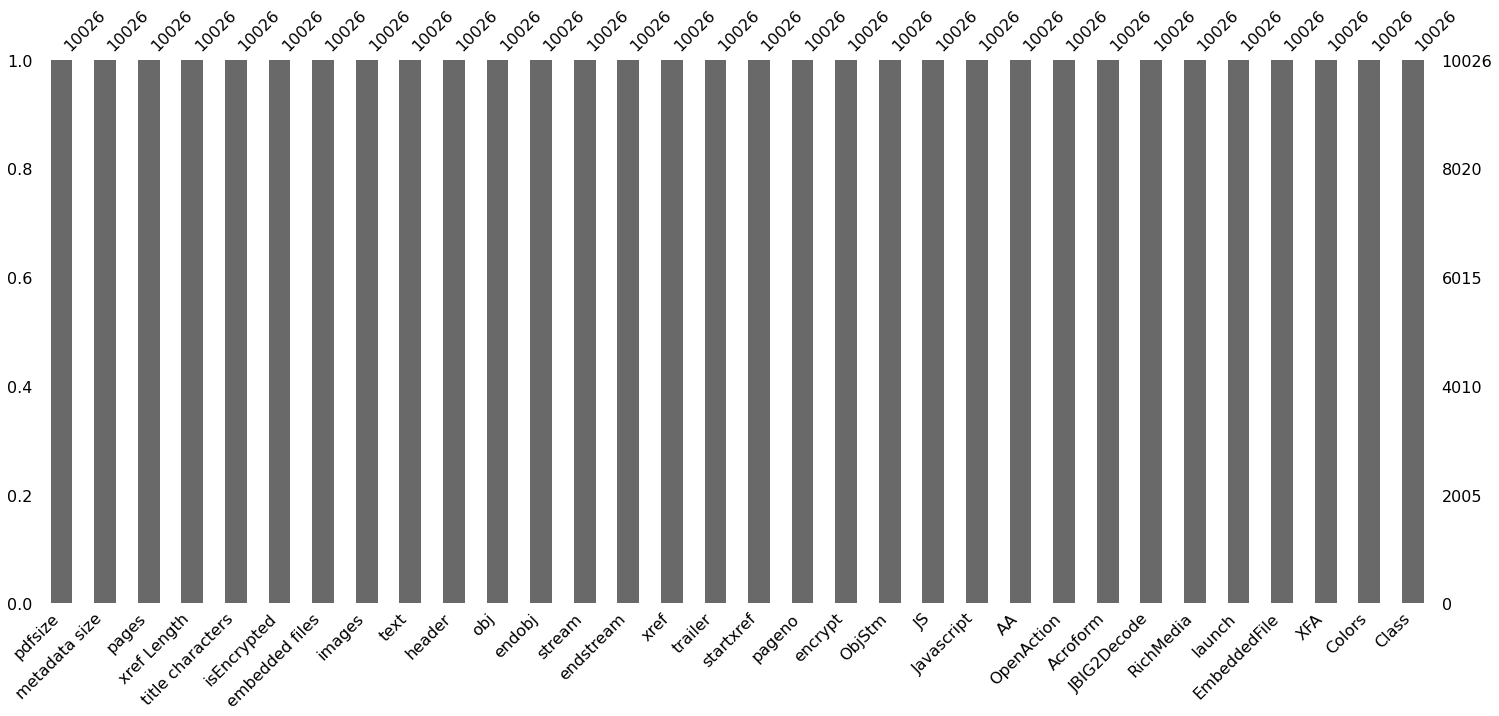

In [154]:
# Visualize Bar chart of missing values
msno.bar(df_pdf);

We can see missing values is very small, So we can go with  the powerful MICE multi-imputer

### Imputation 

#### Numerical Columns

In [130]:
# store numerical columns to vaiable
numeric_columns = [x for x in df_pdf.columns if df_pdf[x].dtype != 'object'] # output 12 numerical variables

# identify Imputer
mice_imputer = IterativeImputer()

# Apply imputation 
df_pdf[numeric_columns] = mice_imputer.fit_transform(df_pdf[numeric_columns])


In [131]:
# Check missing after applied imputation 
df_pdf.isnull().sum()

Fine name           0
pdfsize             0
metadata size       0
pages               0
xref Length         0
title characters    0
isEncrypted         0
embedded files      0
images              1
text                1
header              1
obj                 3
endobj              3
stream              0
endstream           3
xref                3
trailer             0
startxref           3
pageno              3
encrypt             0
ObjStm              0
JS                  3
Javascript          3
AA                  3
OpenAction          3
Acroform            3
JBIG2Decode         3
RichMedia           3
launch              3
EmbeddedFile        3
XFA                 3
Colors              0
Class               1
dtype: int64

In [132]:
sum(df_pdf.isnull().sum())

52

Yeah, we imputed only numerical columns [74 'all missing' - 52 'current/categorical missing' = **22** missing impuuted as **numerical** values].
So, let's impute our categorical columns 

#### Categorical Imputation 

In [133]:
# Drop Fine Name for now..
df_pdf.drop('Fine name', axis = 1, inplace= True)

# store categorical columns to independed vaiable
categorical_columns = [x for x in df_pdf.columns if df_pdf[x].dtype == 'object'] # output 20

# Check values of each categorical column that have missing value/s
for i in categorical_columns:
    print('Number of unique values for *{}*'.format(i), df_pdf[i].nunique())


Number of unique values for *images* 89
Number of unique values for *text* 5
Number of unique values for *header* 50
Number of unique values for *obj* 479
Number of unique values for *endobj* 478
Number of unique values for *endstream* 241
Number of unique values for *xref* 21
Number of unique values for *startxref* 20
Number of unique values for *pageno* 96
Number of unique values for *JS* 32
Number of unique values for *Javascript* 35
Number of unique values for *AA* 40
Number of unique values for *OpenAction* 8
Number of unique values for *Acroform* 10
Number of unique values for *JBIG2Decode* 16
Number of unique values for *RichMedia* 7
Number of unique values for *launch* 5
Number of unique values for *EmbeddedFile* 19
Number of unique values for *XFA* 7
Number of unique values for *Class* 2


In [134]:
# Impute categorical missing with most frequent of each column
# Source: https://stackoverflow.com/questions/25239958/impute-categorical-missing-values-in-scikit-learn
from sklearn.base import TransformerMixin

class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.
        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)
    
 # Apply miputation Function   
df_pdf[categorical_columns] = DataFrameImputer().fit_transform(df_pdf[categorical_columns])

In [135]:
sum(df_pdf.isnull().sum())

0

### Check Duplicates

In [136]:
# Check duplicate points in our dataset
df_pdf.duplicated().sum() # No duplicates

0

### Visualizations

In [137]:
# Check number of samples for each class [Benign, Malicious]
df_pdf.Class.value_counts()

Malicious    5558
Benign       4468
Name: Class, dtype: int64

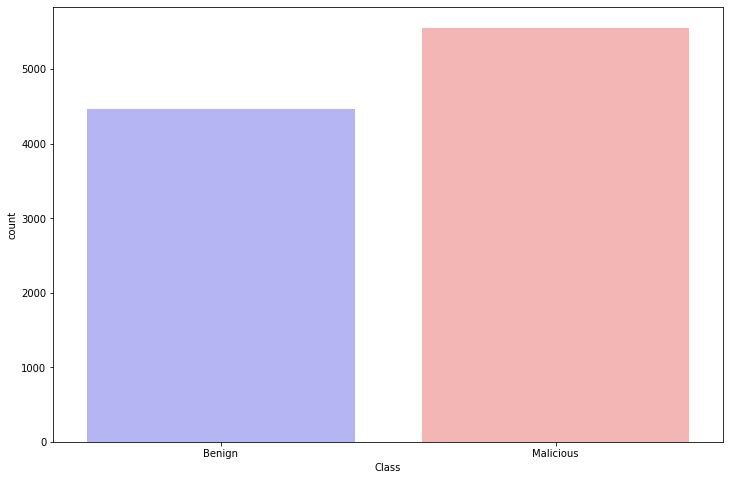

In [144]:
# Visulize our classes 
plt.figure(figsize=(12,8))
sns.countplot(x='Class',order=['Benign', 'Malicious'] ,data= df_pdf, palette= "bwr")


plt.savefig('classes.png')
plt.show()


## Work - 22/11/22